Saving less trafic.jpeg to less trafic.jpeg


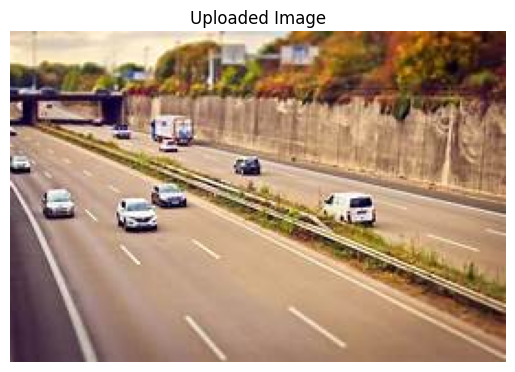

Number of Vehicles: 15
Traffic Status: Heavy Traffic


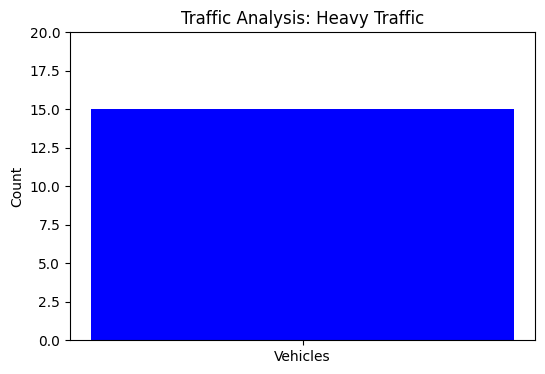

In [2]:
# Necessary imports for Google Colab
from google.colab import files
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from PIL import Image
import io

# Dummy model placeholder (replace with your actual PyTorch model)
class DummyModel:
    def __init__(self):
        pass

    def predict(self, image):
        """
        Simulates prediction logic.
        Replace this with actual inference code for your trained model.
        """
        vehicle_count = 15  # Example output (replace with model output)
        status = self.classify_traffic(vehicle_count)
        return {'vehicles': vehicle_count, 'status': status}

    def classify_traffic(self, vehicle_count):
        """Classifies traffic based on vehicle count."""
        if vehicle_count < 5:
            return "Low Traffic"
        elif 5 <= vehicle_count < 15:
            return "Moderate Traffic"
        else:
            return "Heavy Traffic"

# Load your trained model (replace DummyModel with your trained model)
model = DummyModel()

def process_image(image_path):
    """
    Processes the image and performs model inference.
    """
    # Load and preprocess the image
    image = Image.open(image_path)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize image
        transforms.ToTensor()          # Convert to tensor
    ])
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Perform prediction using the model
    result = model.predict(image_tensor)
    return result

def upload_and_process_image():
    """
    Handles image upload and processes it.
    """
    uploaded = files.upload()
    for file_name in uploaded.keys():
        # Process the uploaded image
        image_path = io.BytesIO(uploaded[file_name])
        result = process_image(image_path)
        display_results(image_path, result)

def display_results(image_path, result):
    """
    Displays the uploaded image and results.
    """
    # Display the uploaded image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Print result details
    print(f"Number of Vehicles: {result['vehicles']}")
    print(f"Traffic Status: {result['status']}")

    # Plot the graph
    plot_graph(result['vehicles'], result['status'])

def plot_graph(vehicle_count, status):
    """
    Plots a bar graph for the vehicle count and traffic status.
    """
    plt.figure(figsize=(6, 4))
    plt.bar(['Vehicles'], [vehicle_count], color='blue')
    plt.ylim(0, max(20, vehicle_count + 5))  # Adjust y-axis dynamically
    plt.title(f"Traffic Analysis: {status}")
    plt.ylabel("Count")
    plt.show()

# Run the upload and process function
upload_and_process_image()
